# Individual Planning Stage

## 1. Data Description

For this project, I will focus primarily on the players.csv dataset, which contains the information needed to address my specific question about the relationship between subscription status and playing hours.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/Jessica-wu10/DSCI_GROUP_13/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Jessica-wu10/DSCI_GROUP_13/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### players.csv Dataset
- Number of observations: 196 unique players
- Variables:
- hashedEmail (String): Unique identifier for each player
- name (String): Player's in-game name
- Age (Float): Player's age in years
- gender (String): Player's gender
- experience (String): Player's prior gaming experience level
- **played_hours (Float): Total hours played on the server - a primary variable of interest** (key variable for my question)
- **subscribe (Boolean): Whether the player subscribed to the newsletter - the target variable** (key variable for my question)

### Potential Data Issues:
- The distribution of play hours may be skewed, with potential outliers affecting model performance.
- Class imbalance in subscription status could affect predictive modeling.
- Potential measurement errors in played_hours tracking.

## 2. Question

### Broad Question: "What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter?"

### Specific Question: Can playing time (played_hours) predict newsletter subscription likelihood among players, and does this relationship vary by experience level?
To prepare the data for analysis, I will need to:

1. Check for and handle any missing values in the played_hours or subscribe columns.
2. Standardize the played_hours variable to have a mean of 0 and standard deviation of 1, as k-NN is sensitive to the scale of input features.
3. Convert the subscribe variable to a binary numeric format (0/1) if it is not already.
4. Address any outliers in the played_hours variable that might disproportionately influence the distance calculations in the k-NN algorithm.
5. Split the data into training, validation, and test sets to properly evaluate model performance.

## 3. Exploratory Data Analysis and Visualization

In [6]:
# Display the first few rows to confirm successful loading
head(players)

# Check for missing values
sum(is.na(players))

# Identify quantitative variables
quant_vars <- players |>
  select_if(is.numeric)

# Compute the mean value for each quantitative variable
mean_values <- players |>
  summarise(
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE))

# Display mean values in a table format
tibble(mean_values)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 2

Mean_Age,Mean_Played_Hours
<dbl>,<dbl>
20.52062,5.845918


Now I'll create exploratory visualizations to better understand the data, particularly focusing on the relationship between my variables of interest: played_hours and subscribe.

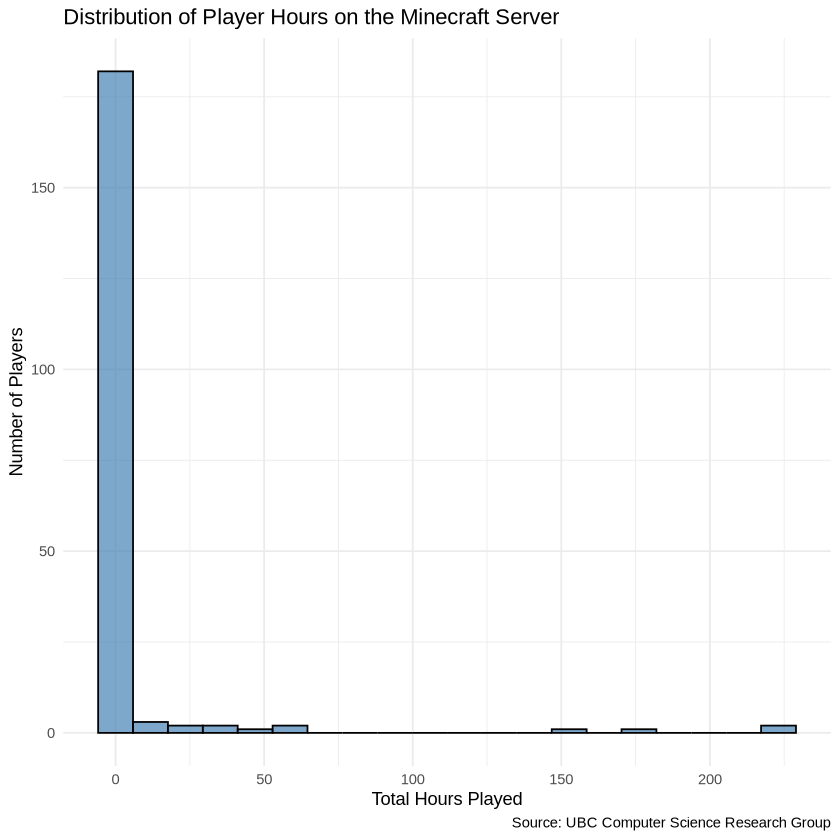

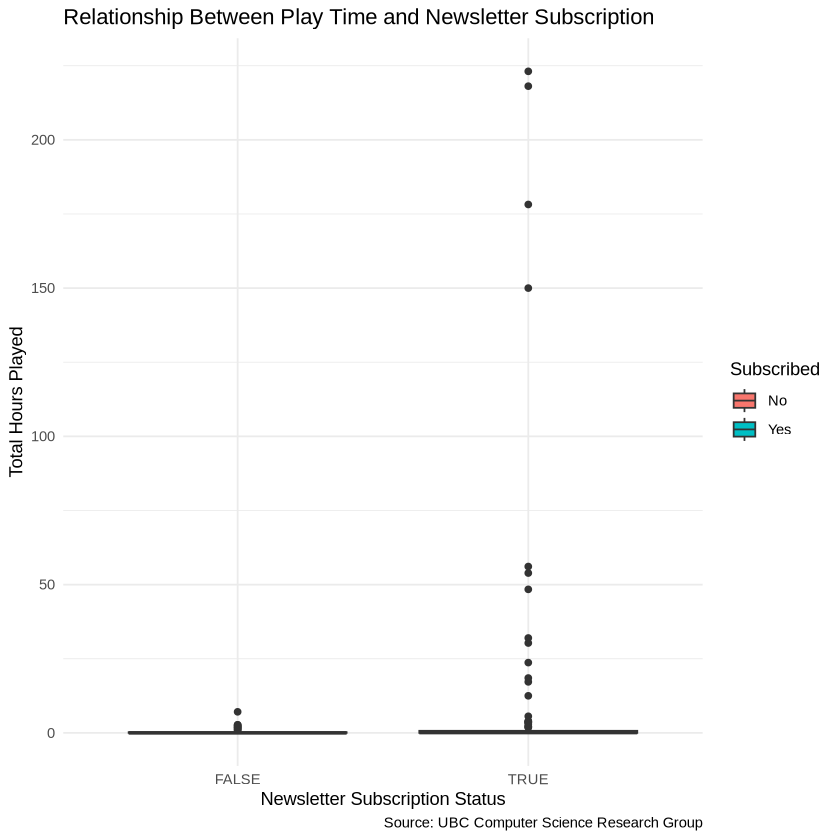

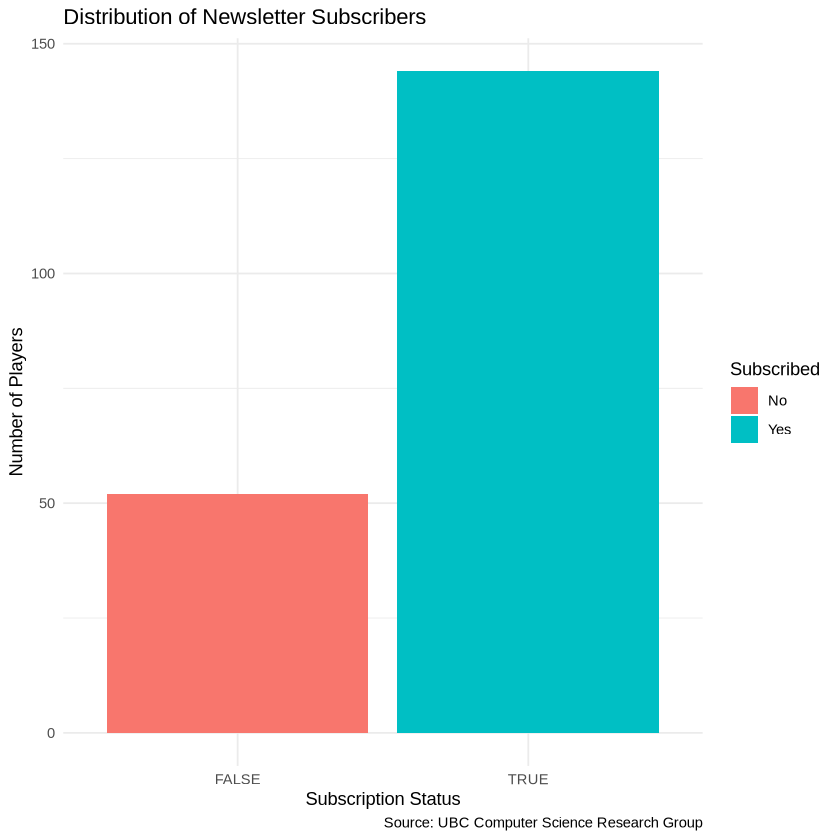

In [7]:
# Visualization 1: Distribution of played hours
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Player Hours on the Minecraft Server",
       x = "Total Hours Played",
       y = "Number of Players",
       caption = "Source: UBC Computer Science Research Group") +
  theme_minimal()

# Visualization 2: Played hours by subscription status
ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Relationship Between Play Time and Newsletter Subscription",
       x = "Newsletter Subscription Status",
       y = "Total Hours Played",
       caption = "Source: UBC Computer Science Research Group") +
  scale_fill_discrete(name = "Subscribed", labels = c("No", "Yes")) +
  theme_minimal()

# Visualization 3: Distribution of subscription status
ggplot(players, aes(x = subscribe, fill = subscribe)) +
  geom_bar() +
  labs(title = "Distribution of Newsletter Subscribers",
       x = "Subscription Status",
       y = "Number of Players",
       caption = "Source: UBC Computer Science Research Group") +
  scale_fill_discrete(name = "Subscribed", labels = c("No", "Yes")) +
  theme_minimal()

### Insights from Exploratory Visualizations
1. Most players play for a shorter time on average, with only a very small percentage of players playing for a longer time on average. This skewed distribution may require data transformation or outlier handling when applying the k-NN algorithm, as extreme values can significantly affect distance calculations.
2. Boxplots comparing play time by subscription status show that the median play time for newsletter subscribers tends to be higher than non-subscribers, supporting the hypothesis that play time can predict subscription status.
3. The subscription status distribution suggests potential class imbalance that may affect k-NN performance, and techniques such as stratified sampling may be needed during model development.
These insights suggest that there is a relationship between played_hours and subscription status, but determining the optimal k value and addressing the characteristics of the distribution will be key challenges in developing effective predictive models.

## 4. Methods and Plan:

I propose using **k-Nearest Neighbors (k-NN)** classification to address my research question about the relationship between player experience level and newsletter subscription status.

## Why k-NN is Appropriate
1. It can effectively model non-linear relationships between play time and subscription status.
2. The dataset size (196 players) is manageable for k-NN, which can become computationally expensive with very large datasets.
3. It allows for visualization of decision boundaries, which will help communicate findings to stakeholders.

## Required Assumptions
1. The feature scales appropriately (will require standardization).

## Potential Limitations
1. Sensitivity to the choice of k (number of neighbors).
2. The curse of dimensionality if we add more features.
3. Potential overfitting if the training data is not representative.

## Model Selection Approach
1. Determine the optimal k value using cross-validation.
2. Evaluate model performance using accuracy, precision, recall, and F1-score.

## Data Processing Plan
- Training set (70% of data): For model building and parameter tuning.
- Validation set (15% of data): For hyperparameter optimization.
- Test set (15% of data): For final evaluation.

- Standardize played_hours to have zero mean and unit variance.
- Address any outliers in played_hours.

- Use 5-fold cross-validation on the training set to tune the k parameter.
- Also evaluate different distance metrics (Euclidean or others).